In [132]:
import os
import pandas as pd
import numpy as np
from MarkowitzPortfolioOptimizer import *
from UsefulFunctionsForModels import *
from PlotsProject import plot_covariance_heatmap

In [133]:
path='test_prices'

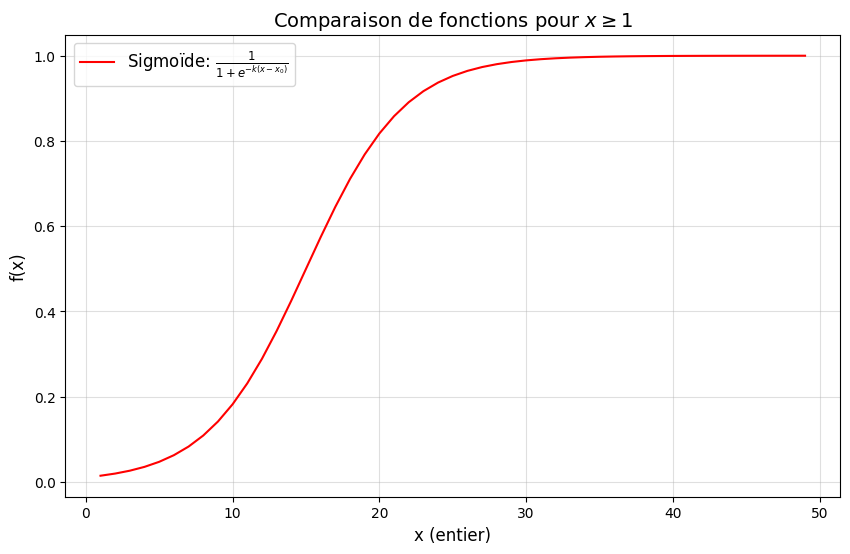

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions
def rational(x, c=10):
    return x / (x + c)

def sqrt_normalized(x, c=5):
    return np.sqrt(x) / (np.sqrt(x) + c)

def log_adjusted(x, c=2):
    return np.log(1 + x) / (np.log(1 + x) + c)

def sigmoid_discrete(x, k=0.3, x0=15):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Valeurs discrètes de x
x = np.arange(1, 50)  # Entiers naturels positifs

# Calcul des fonctions
y_rational = rational(x, c=5)
y_sqrt = sqrt_normalized(x, c=5)
y_log = log_adjusted(x, c=2)
y_sigmoid = sigmoid_discrete(x, k=0.3, x0=15)

# Tracer les courbes
plt.figure(figsize=(10, 6))
#plt.plot(x, y_rational, label=r"Rationnelle: $\frac{x}{x + c}$", color="blue")
#plt.plot(x, y_sqrt, label=r"Racine carrée: $\frac{\sqrt{x}}{\sqrt{x} + c}$", color="green")
#plt.plot(x, y_log, label=r"Logarithme: $\frac{\log(1 + x)}{\log(1 + x) + c}$", color="orange")
plt.plot(x, y_sigmoid, label=r"Sigmoïde: $\frac{1}{1 + e^{-k(x - x_0)}}$", color="red")
plt.title("Comparaison de fonctions pour $x \geq 1$", fontsize=14)
plt.xlabel("x (entier)", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.show()


In [135]:
from UsefulFunctionsForModels import get_dataframe_cards_matrix

In [136]:
df=get_dataframe_cards_matrix(path)

In [137]:
df

,card_id,last_price,mean_return,fiability,fiability_dot_return
0,xyp-XY81_Holofoil,9.89,0.02,1.000000,0.02
1,smp-SM79_Holofoil,10.79,-0.00,1.000000,-0.00
2,xyp-XY79_Holofoil,20.39,-0.03,1.000000,-0.03
3,xy7-89_Holofoil,14.34,0.02,1.000000,0.02
4,basep-10_Holofoil,13.81,-0.00,1.000000,-0.00
...,...,...,...,...,...
61,ecard1-82_Normal,5.71,0.00,1.000000,0.00
62,bw11-88_Holofoil,6.75,0.06,0.999999,0.06
63,sma-SV76_Holofoil,78.08,0.00,1.000000,0.00
64,pl1-3_Holofoil,8.46,0.00,0.645656,0.00


In [138]:
cov=calculate_covariance_matrix(df,path)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [139]:
cov

,xyp-XY81_Holofoil,smp-SM79_Holofoil,xyp-XY79_Holofoil,xy7-89_Holofoil,basep-10_Holofoil,xy2-100_Holofoil,ex14-85_Reverse_Holofoil,smp-SM80_Holofoil,xy3-72_Reverse_Holofoil,xyp-XY78_Holofoil,...,bw11-3_Reverse_Holofoil,smp-SM82_Holofoil,hgss2-84_Holofoil,pl1-5_Holofoil,sma-SV77_Holofoil,ecard1-82_Normal,bw11-88_Holofoil,sma-SV76_Holofoil,pl1-3_Holofoil,xy2-12_Holofoil
xyp-XY81_Holofoil,0.344374,-0.247983,0.052113,0.487926,0.370813,5.668138,0.195001,0.181865,-0.070522,0.915686,...,-0.181318,0.274911,-0.126381,-0.127875,-0.241857,0.068635,0.241800,-1.388256,-0.042667,-0.326565
smp-SM79_Holofoil,-0.247983,0.323406,0.069994,-0.480429,-0.389859,-5.063097,-0.189415,-0.284573,0.095923,-0.771905,...,0.345071,-0.245357,0.198146,0.102566,0.335892,-0.067706,-0.254465,1.391289,0.125201,0.337616
xyp-XY79_Holofoil,0.052113,0.069994,0.402770,-0.228407,-0.049663,0.210615,-0.009267,-0.210908,0.016537,-0.175806,...,0.001793,-0.487858,0.048726,-0.051765,0.262592,-0.016141,-0.080603,0.796719,0.124553,0.121666
xy7-89_Holofoil,0.487926,-0.480429,-0.228407,1.032460,0.675121,9.099037,0.332492,0.492682,-0.140039,1.640822,...,-0.313557,0.836364,-0.226344,-0.145844,-0.640302,0.142129,0.471572,-3.010595,-0.192104,-0.613992
basep-10_Holofoil,0.370813,-0.389859,-0.049663,0.675121,0.823422,9.263107,0.345546,0.549396,-0.175400,1.203544,...,-0.487960,0.457374,-0.141719,-0.147198,-0.442641,0.159233,0.527982,-1.148748,-0.311188,-0.528284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ecard1-82_Normal,0.068635,-0.067706,-0.016141,0.142129,0.159233,1.836984,0.071571,0.118981,-0.034216,0.240465,...,-0.092858,0.106916,-0.023878,-0.025248,-0.096616,0.040322,0.109784,-0.210663,-0.072876,-0.108540
bw11-88_Holofoil,0.241800,-0.254465,-0.080603,0.471572,0.527982,6.322992,0.235898,0.429742,-0.128730,0.830090,...,-0.375858,0.419206,-0.112859,-0.096077,-0.334010,0.109784,0.382832,-0.754171,-0.264311,-0.385138
sma-SV76_Holofoil,-1.388256,1.391289,0.796719,-3.010595,-1.148748,-18.925789,-0.654717,-0.507631,0.196763,-4.489339,...,-0.003419,-2.303831,0.810017,0.370308,2.183659,-0.210663,-0.754171,13.569178,-0.283340,1.432526
pl1-3_Holofoil,-0.042667,0.125201,0.124553,-0.192104,-0.311188,-3.522268,-0.144963,-0.409313,0.115560,-0.344617,...,0.390781,-0.322536,0.074300,0.019443,0.191031,-0.072876,-0.264311,-0.283340,0.331216,0.208662


<module 'matplotlib.pyplot' from '/Users/nayelbenabdesadok/opt/anaconda3/envs/pokemon_card/lib/python3.9/site-packages/matplotlib/pyplot.py'>

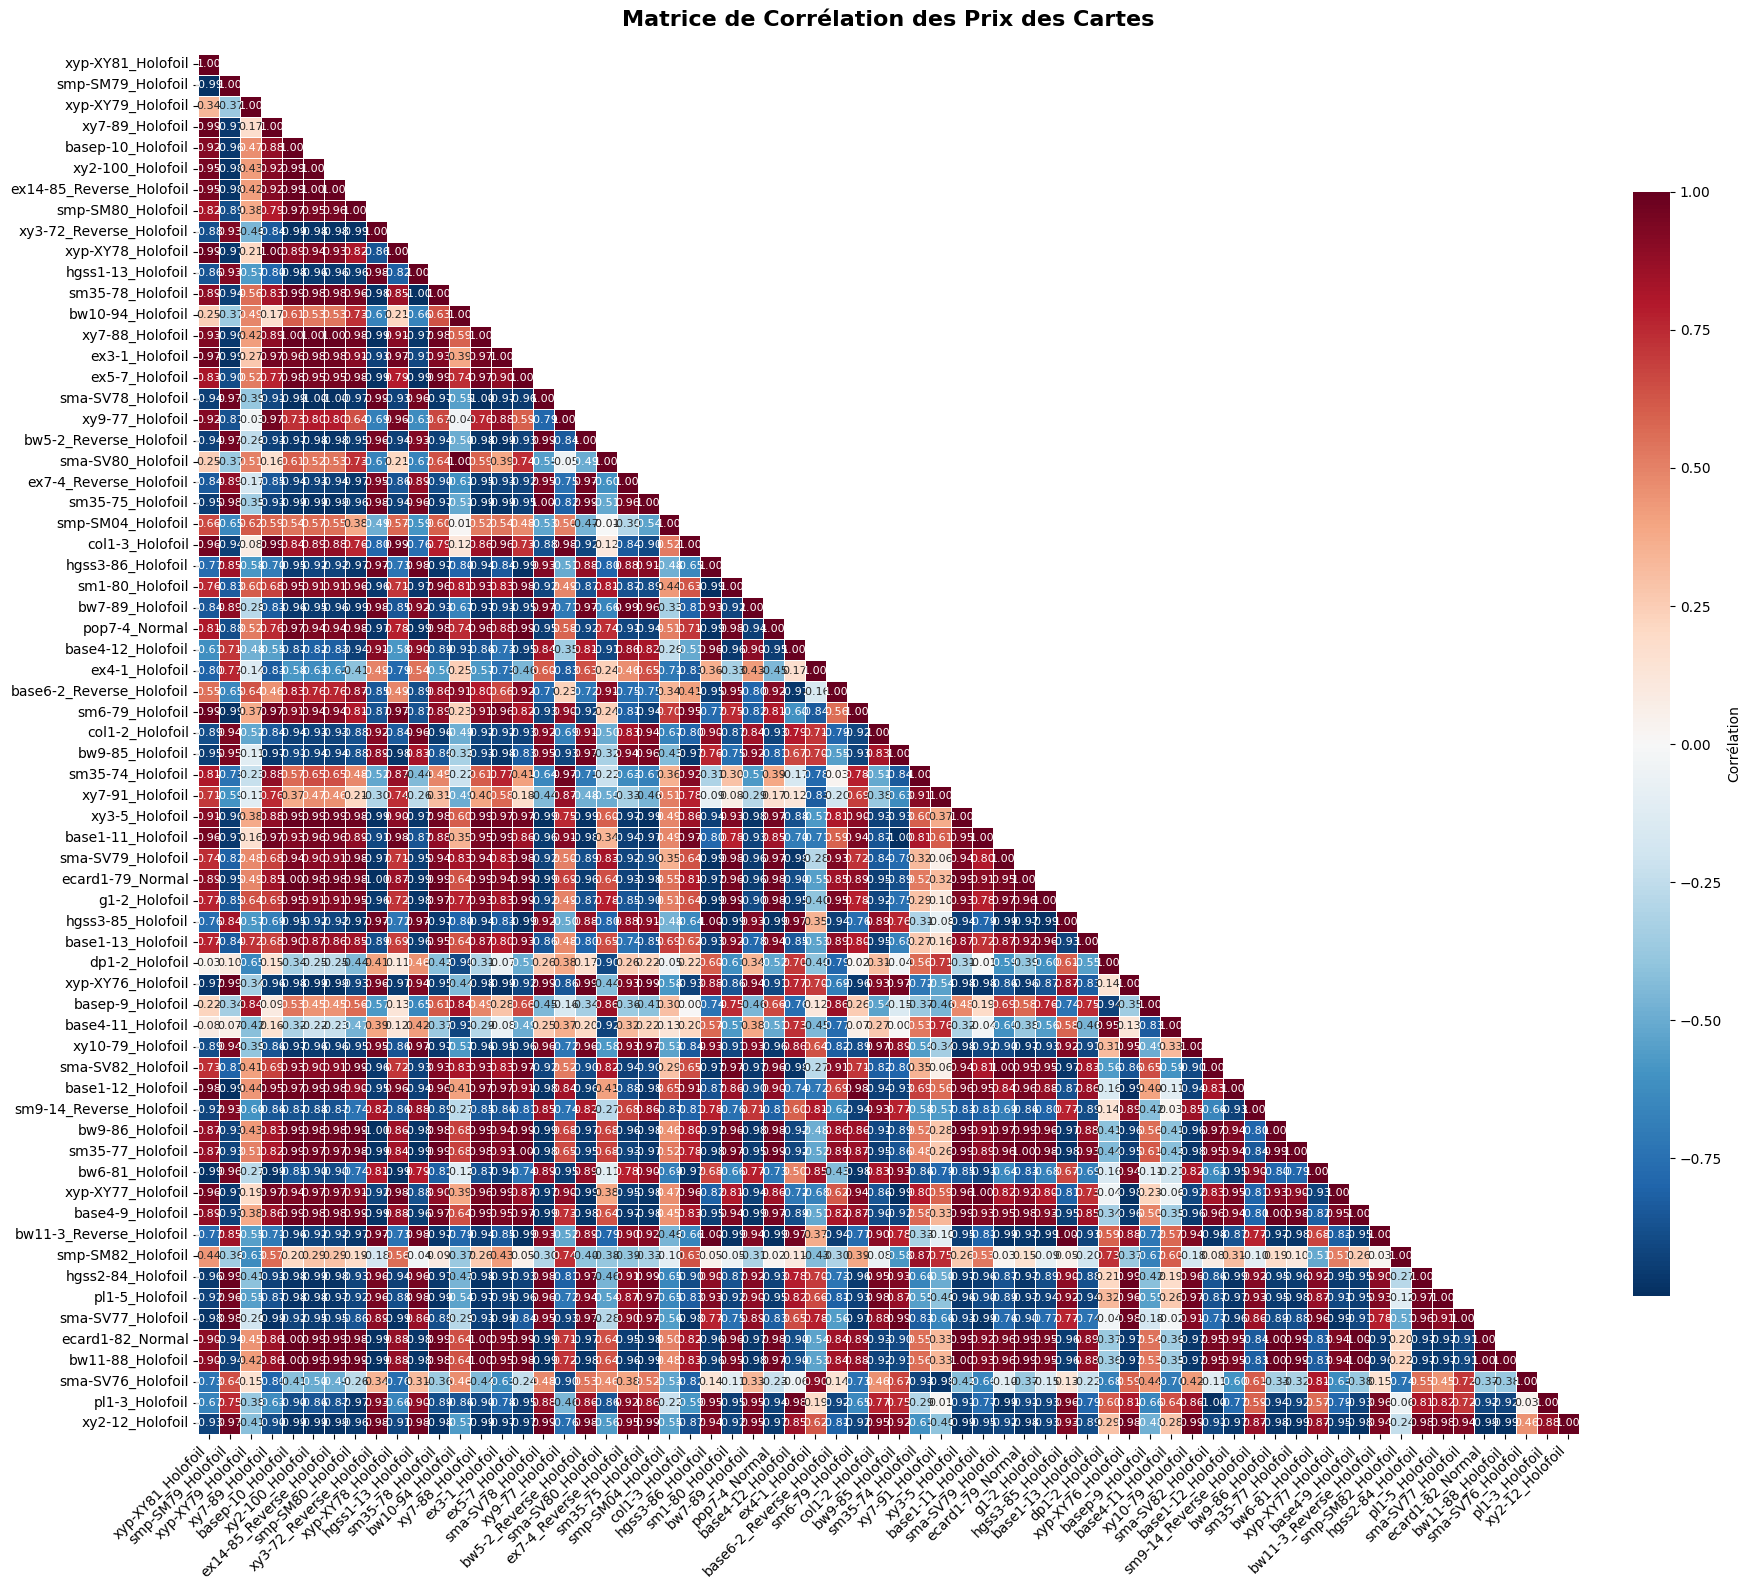

In [140]:
plot_covariance_heatmap(cov)

In [141]:
import numpy as np
import pandas as pd
import os
from UsefulFunctionsForModels import calculate_covariance_matrix
from scipy.optimize import minimize, linear_sum_assignment

In [182]:
class MarkowitzOptimizer:
    def __init__(self, amount_to_invest, hope_return, dataframe_cards_info,number_of_cards_invested):
        self.amount_to_invest = amount_to_invest
        self.hope_return = hope_return
        self.dataframe_cards_info = dataframe_cards_info
        self.number_of_cards_invested = number_of_cards_invested
    
    def get_optimized_return_mean_matrix_fiability(self, threshold=0.01, ratio=0.5):
        filtered_df = self.dataframe_cards_info[
            (self.dataframe_cards_info["fiability_dot_return"] > threshold) & 
            (self.dataframe_cards_info['last_price'] < ratio * self.amount_to_invest)
        ]
        return filtered_df
    
    def objective_weights(self, weights):
        filtered_df = self.get_optimized_return_mean_matrix_fiability()
        covariance_filtered_cards = calculate_covariance_matrix(filtered_df,path)
        return np.dot(weights.T, np.dot(covariance_filtered_cards, weights))
    
    def set_constraints(self):
        filtered_df = self.get_optimized_return_mean_matrix_fiability()
        mean_matrix = filtered_df["fiability_dot_return"].values  # Convertir en array numpy
        n_cards = len(mean_matrix)
                
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'ineq', 'fun': lambda x: np.dot(x, mean_matrix) - 0.9 * self.hope_return},  
            {'type': 'ineq', 'fun': lambda x: 1.1 * self.hope_return - np.dot(x, mean_matrix)}  
        ]
        
        bounds = tuple((0, 1) for _ in range(n_cards))
        return constraints, bounds
    
    def optimize_portfolio(self):
        filtered_df = self.get_optimized_return_mean_matrix_fiability()
        n_cards = len(filtered_df)
        
        if n_cards == 0:
            raise ValueError("Aucune carte ne correspond aux critères de filtrage")
        
        constraints, bounds = self.set_constraints()
        initial_weights = np.array([1/n_cards] * n_cards)
        
        result = minimize(
            self.objective_weights, 
            initial_weights, 
            method='SLSQP', 
            bounds=bounds, 
            constraints=constraints
        )
        
        
        return result.x, filtered_df

    def optimize_cards_sell(self):
        df = self.get_optimized_return_mean_matrix_fiability()
        prices = df["last_price"].values
        weights, _ = self.optimize_portfolio()
        
        # Trier les cartes par ordre décroissant de poids
        sorted_indices = np.argsort(weights)[::-1]
        
        total_investment = 0
        selected_indices = []
        
        # Sélectionner les cartes jusqu'à ce que le montant total soit atteint ou dépassé
        for idx in sorted_indices:
            if total_investment + prices[idx] <= self.amount_to_invest:
                total_investment += prices[idx]
                selected_indices.append(idx)
            else:
                # Vérifier si ajouter cette carte nous rapproche plus du montant cible
                if abs(self.amount_to_invest - (total_investment + prices[idx])) < abs(self.amount_to_invest - total_investment):
                    total_investment += prices[idx]
                    selected_indices.append(idx)
                break
        
        # Créer la sélection binaire
        binary_selection = np.zeros(len(weights))
        binary_selection[selected_indices] = 1
        
        return binary_selection, total_investment, df.iloc[selected_indices]



In [191]:
amount=100
hope=0.15
n=5
markowitz=MarkowitzOptimizer(amount,hope,df,n)

In [192]:
a=markowitz.optimize_cards_sell()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [193]:
a[1]

102.09

In [194]:
a[0]

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.])

In [195]:
filtered=markowitz.get_optimized_return_mean_matrix_fiability()

In [196]:
filtered

,card_id,last_price,mean_return,fiability,fiability_dot_return
0,xyp-XY81_Holofoil,9.89,0.02,1.000000,0.020000
3,xy7-89_Holofoil,14.34,0.02,1.000000,0.020000
15,ex5-7_Holofoil,9.73,0.66,0.973403,0.642446
17,xy9-77_Holofoil,7.56,0.06,1.000000,0.060000
23,col1-3_Holofoil,11.12,0.16,0.645656,0.103305
27,pop7-4_Normal,7.09,0.28,0.047426,0.013279
36,xy3-5_Holofoil,8.08,0.95,1.000000,0.950000
37,base1-11_Holofoil,27.28,0.32,1.000000,0.320000
40,g1-2_Holofoil,8.32,0.29,1.000000,0.290000
45,basep-9_Holofoil,40.05,0.24,1.000000,0.240000


In [50]:
cov=calculate_covariance_matrix(filtered,path)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [51]:
cov

,ex5-7_Holofoil,col1-3_Holofoil,pop7-4_Normal,xy3-5_Holofoil,g1-2_Holofoil,sm9-14_Reverse_Holofoil
ex5-7_Holofoil,0.584530,0.308281,0.186057,0.703925,0.539548,-0.008334
col1-3_Holofoil,0.308281,0.856892,0.110255,0.702096,0.108171,-0.027724
pop7-4_Normal,0.186057,0.110255,0.173009,0.274293,0.148335,-0.029736
xy3-5_Holofoil,0.703925,0.702096,0.274293,1.159826,0.581869,-0.025108
g1-2_Holofoil,0.539548,0.108171,0.148335,0.581869,0.821156,-0.026814
sm9-14_Reverse_Holofoil,-0.008334,-0.027724,-0.029736,-0.025108,-0.026814,0.029981


<module 'matplotlib.pyplot' from '/Users/nayelbenabdesadok/opt/anaconda3/envs/pokemon_card/lib/python3.9/site-packages/matplotlib/pyplot.py'>

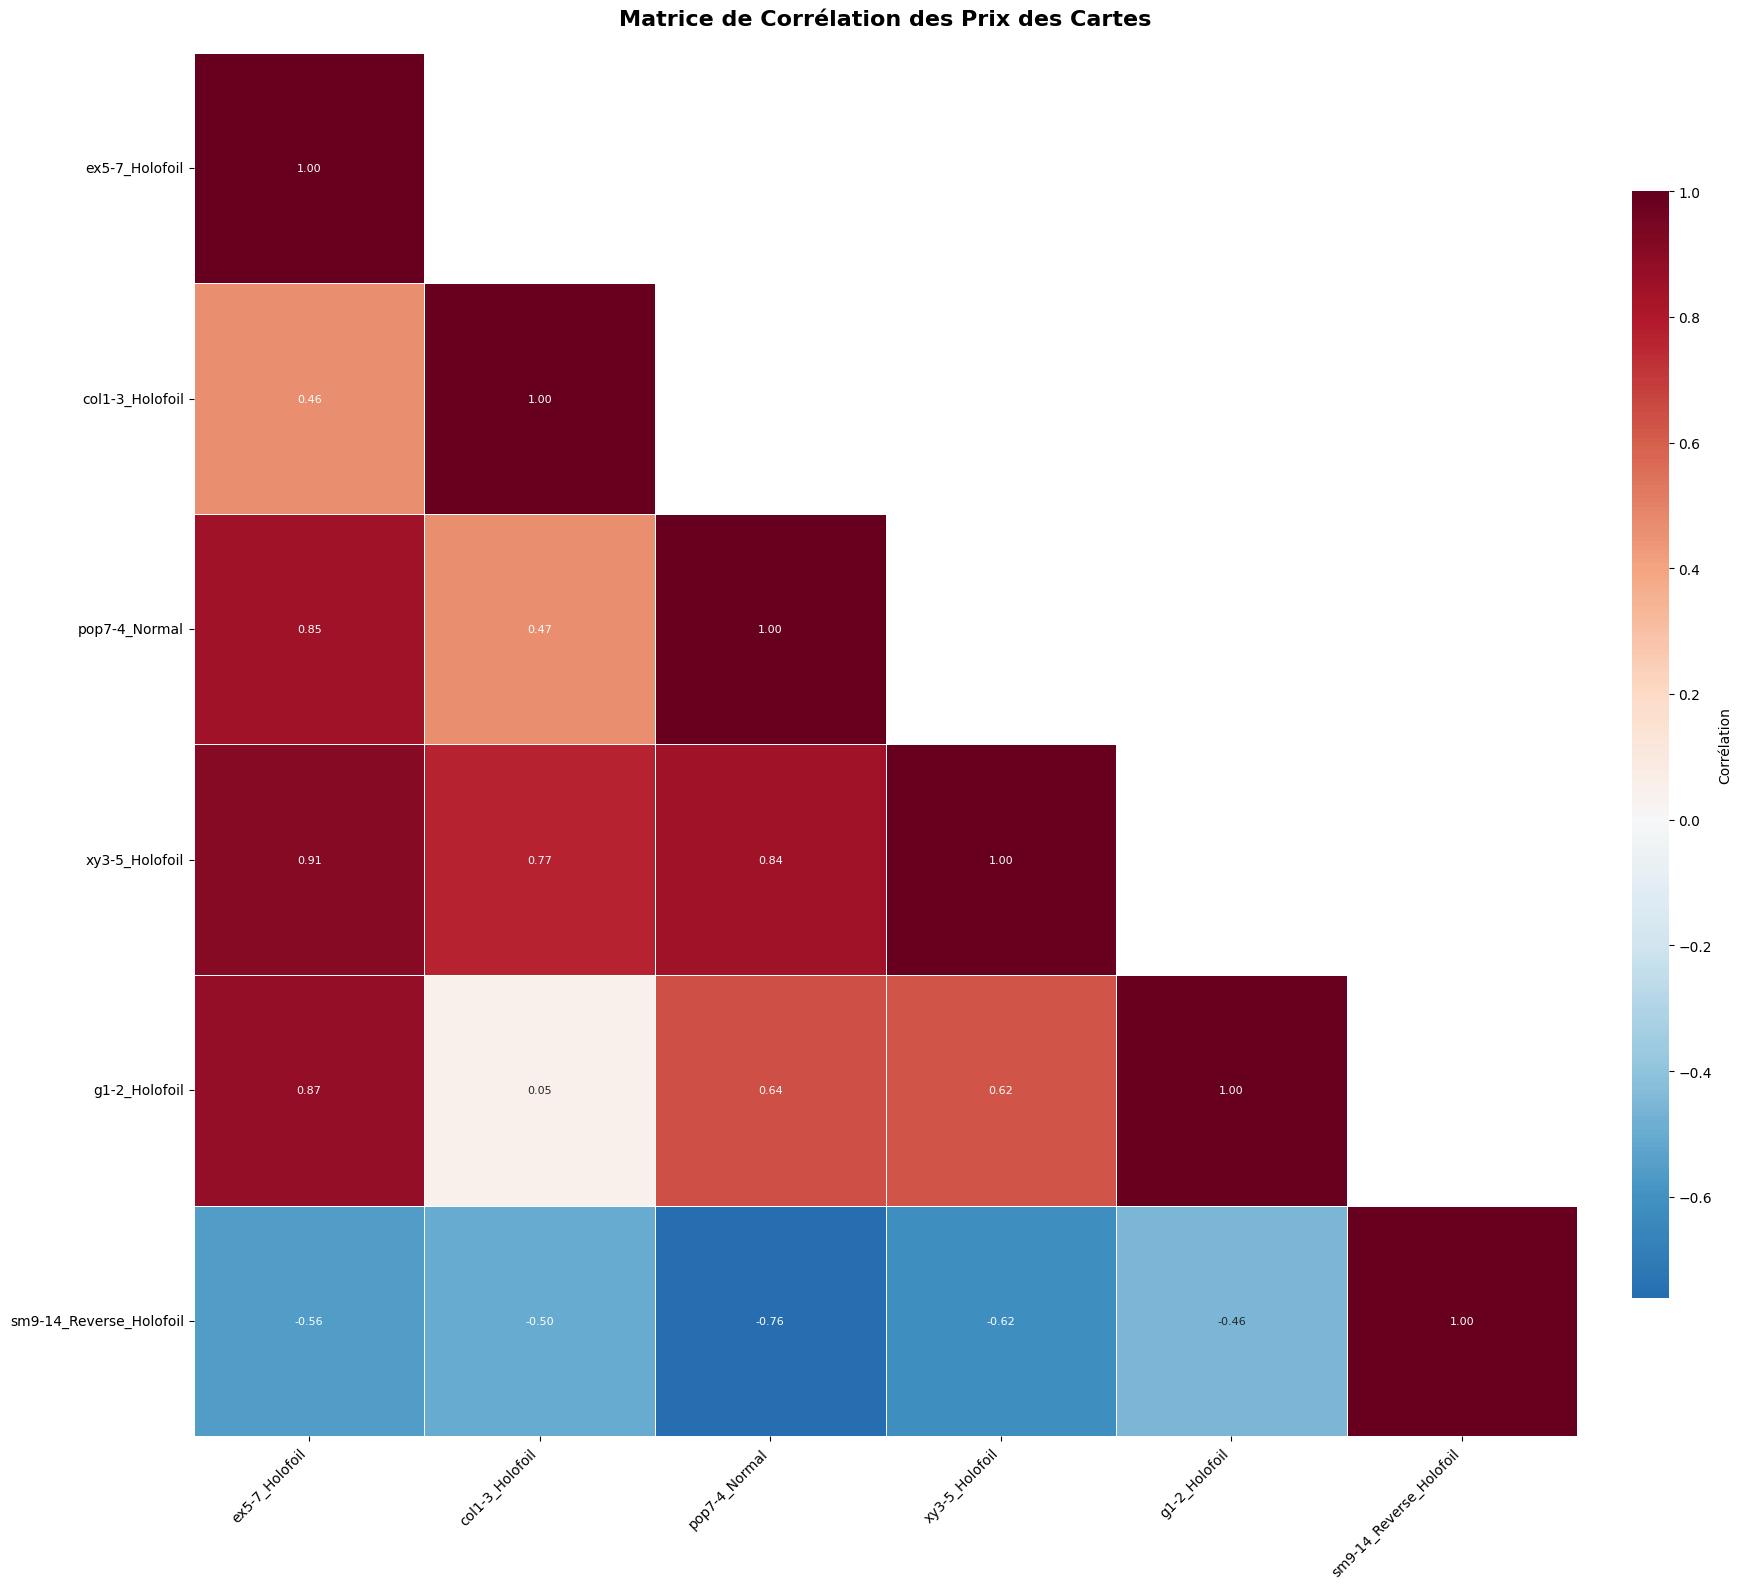

In [30]:
plot_covariance_heatmap(cov)